In [129]:
import torch
import numpy as np
from glob import glob
import os
PATH = '/home/michael/Master-Thesis/CKIM_Competition/exp/Feature_Analysis_Graph-DC_FedVAE_2_out_global_private_NEW_sim_loss_lr_0_1_A0_F0_001_G0_001_H10_I5sim_loss_mse/FedDomSep_GraphDC_gin_on_fs_contest_data_lr0.1_lstep1_/features'

In [130]:
interm_trains = {1:[], 2:[],3:[], 4:[],5:[], 6:[],7:[], 8:[],9:[], 10:[],11:[], 12:[],13:[]}
global_trains = {1:[], 2:[],3:[], 4:[],5:[], 6:[],7:[], 8:[],9:[], 10:[],11:[], 12:[],13:[]}
local_trains = {1:[], 2:[],3:[], 4:[],5:[], 6:[],7:[], 8:[],9:[], 10:[],11:[], 12:[],13:[]}
labels = {1:[], 2:[],3:[], 4:[],5:[], 6:[],7:[], 8:[],9:[], 10:[],11:[], 12:[],13:[]}


In [131]:


all_files = [file
                 for path, subdir, files in os.walk(PATH)
                 for file in glob(os.path.join(path, '*.pt'))]
all_files.sort()

In [132]:
def get_files(path):
    for client in range(1, 13+1):
        client_path = f"{PATH}/client_{client}"
        all_files = [file
                 for path, subdir, files in os.walk(client_path)
                 for file in glob(os.path.join(path, '*.pt'))]
        all_files.sort()
        for file in all_files:
            file_name = os.path.basename(file)
            file_name_without_ending = file_name[:-3]
            if file_name_without_ending.startswith('global_val') and not file_name_without_ending.endswith('labels'):
                global_trains[client].append(torch.load(file).cpu().detach().numpy())
            if file_name_without_ending.startswith('interm_val') and not file_name_without_ending.endswith('labels'):
                interm_trains[client].append(torch.load(file).cpu().detach().numpy())
            if file_name_without_ending.startswith('local_val') and not file_name_without_ending.endswith('labels'):
                local_trains[client].append(torch.load(file).cpu().detach().numpy())
            if file_name_without_ending.startswith('val') and file_name_without_ending.endswith('labels'):
                labels[client].append(torch.load(file).cpu().detach().numpy())
        interm_trains[client] = np.concatenate(interm_trains[client])
        global_trains[client] = np.concatenate(global_trains[client])
        local_trains[client] = np.concatenate(local_trains[client])
        labels[client] = np.concatenate(labels[client])


In [133]:
get_files(PATH)

In [134]:
import numpy as np
#concat_X=global_train
data_out_global = {}
data_out_interm = {}

for key in interm_trains.keys():
    data_out_global[key] = global_trains[key] + local_trains[key]
    data_out_interm[key] = interm_trains[key] + local_trains[key]

X_concat_global = []
X_concat_interm = []
labels_concat = []

for key in interm_trains.keys():
    X_concat_global.append(data_out_global[key])
    X_concat_interm.append(data_out_interm[key])
    labels_concat.append(labels[key])

X_concat_global = np.concatenate(X_concat_global)
X_concat_interm = np.concatenate(X_concat_interm)
labels_concat = np.concatenate(labels_concat)

In [135]:
from sklearn.manifold import TSNE

In [136]:
labels_global = labels.copy()


In [137]:
X_concat = np.concatenate([X_concat_global, X_concat_interm])
labels_double_concat = np.concatenate([labels_concat])

In [138]:
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=25).fit_transform(X_concat, labels_double_concat)

In [139]:
X_embedded.shape[0]//2

3883

In [140]:
X_embedded_global = X_embedded[:3883,:]
X_embedded_interm = X_embedded[3883:,:]

In [141]:
#X_embedded_global = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=25).fit_transform(X_concat_global, labels_concat)
#X_embedded_local = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=25).fit_transform(X_concat_interm, labels_concat)
#X_embedded_interm = X_embedded_local

In [142]:
#X_embedded_interm = X_embedded_local

In [143]:
X_embedded_global_clients = {}
X_embedded_interm_clients = {}
labels_clients = {}
total_size = 0

for client in range(1, 13+1):
    print(f"size client {client}: {interm_trains[client].shape[0]}")
    size = interm_trains[client].shape[0]
    size_old = total_size
    total_size += size
    X_embedded_global_clients[client] = X_embedded_global[size_old:total_size,:]
    X_embedded_interm_clients[client] = X_embedded_interm[size_old:total_size,:]
    labels_clients[client] = labels_concat[size_old:total_size]

size client 1: 38
size client 2: 81
size client 3: 93
size client 4: 151
size client 5: 69
size client 6: 400
size client 7: 822
size client 8: 867
size client 9: 825
size client 10: 67
size client 11: 70
size client 12: 200
size client 13: 200


In [144]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(30, 18))
plt.rcParams["figure.figsize"] = (30,18)

<Figure size 3000x1800 with 0 Axes>

In [145]:
"""yellow: label=1"""

'yellow: label=1'

In [187]:
client_num = 13

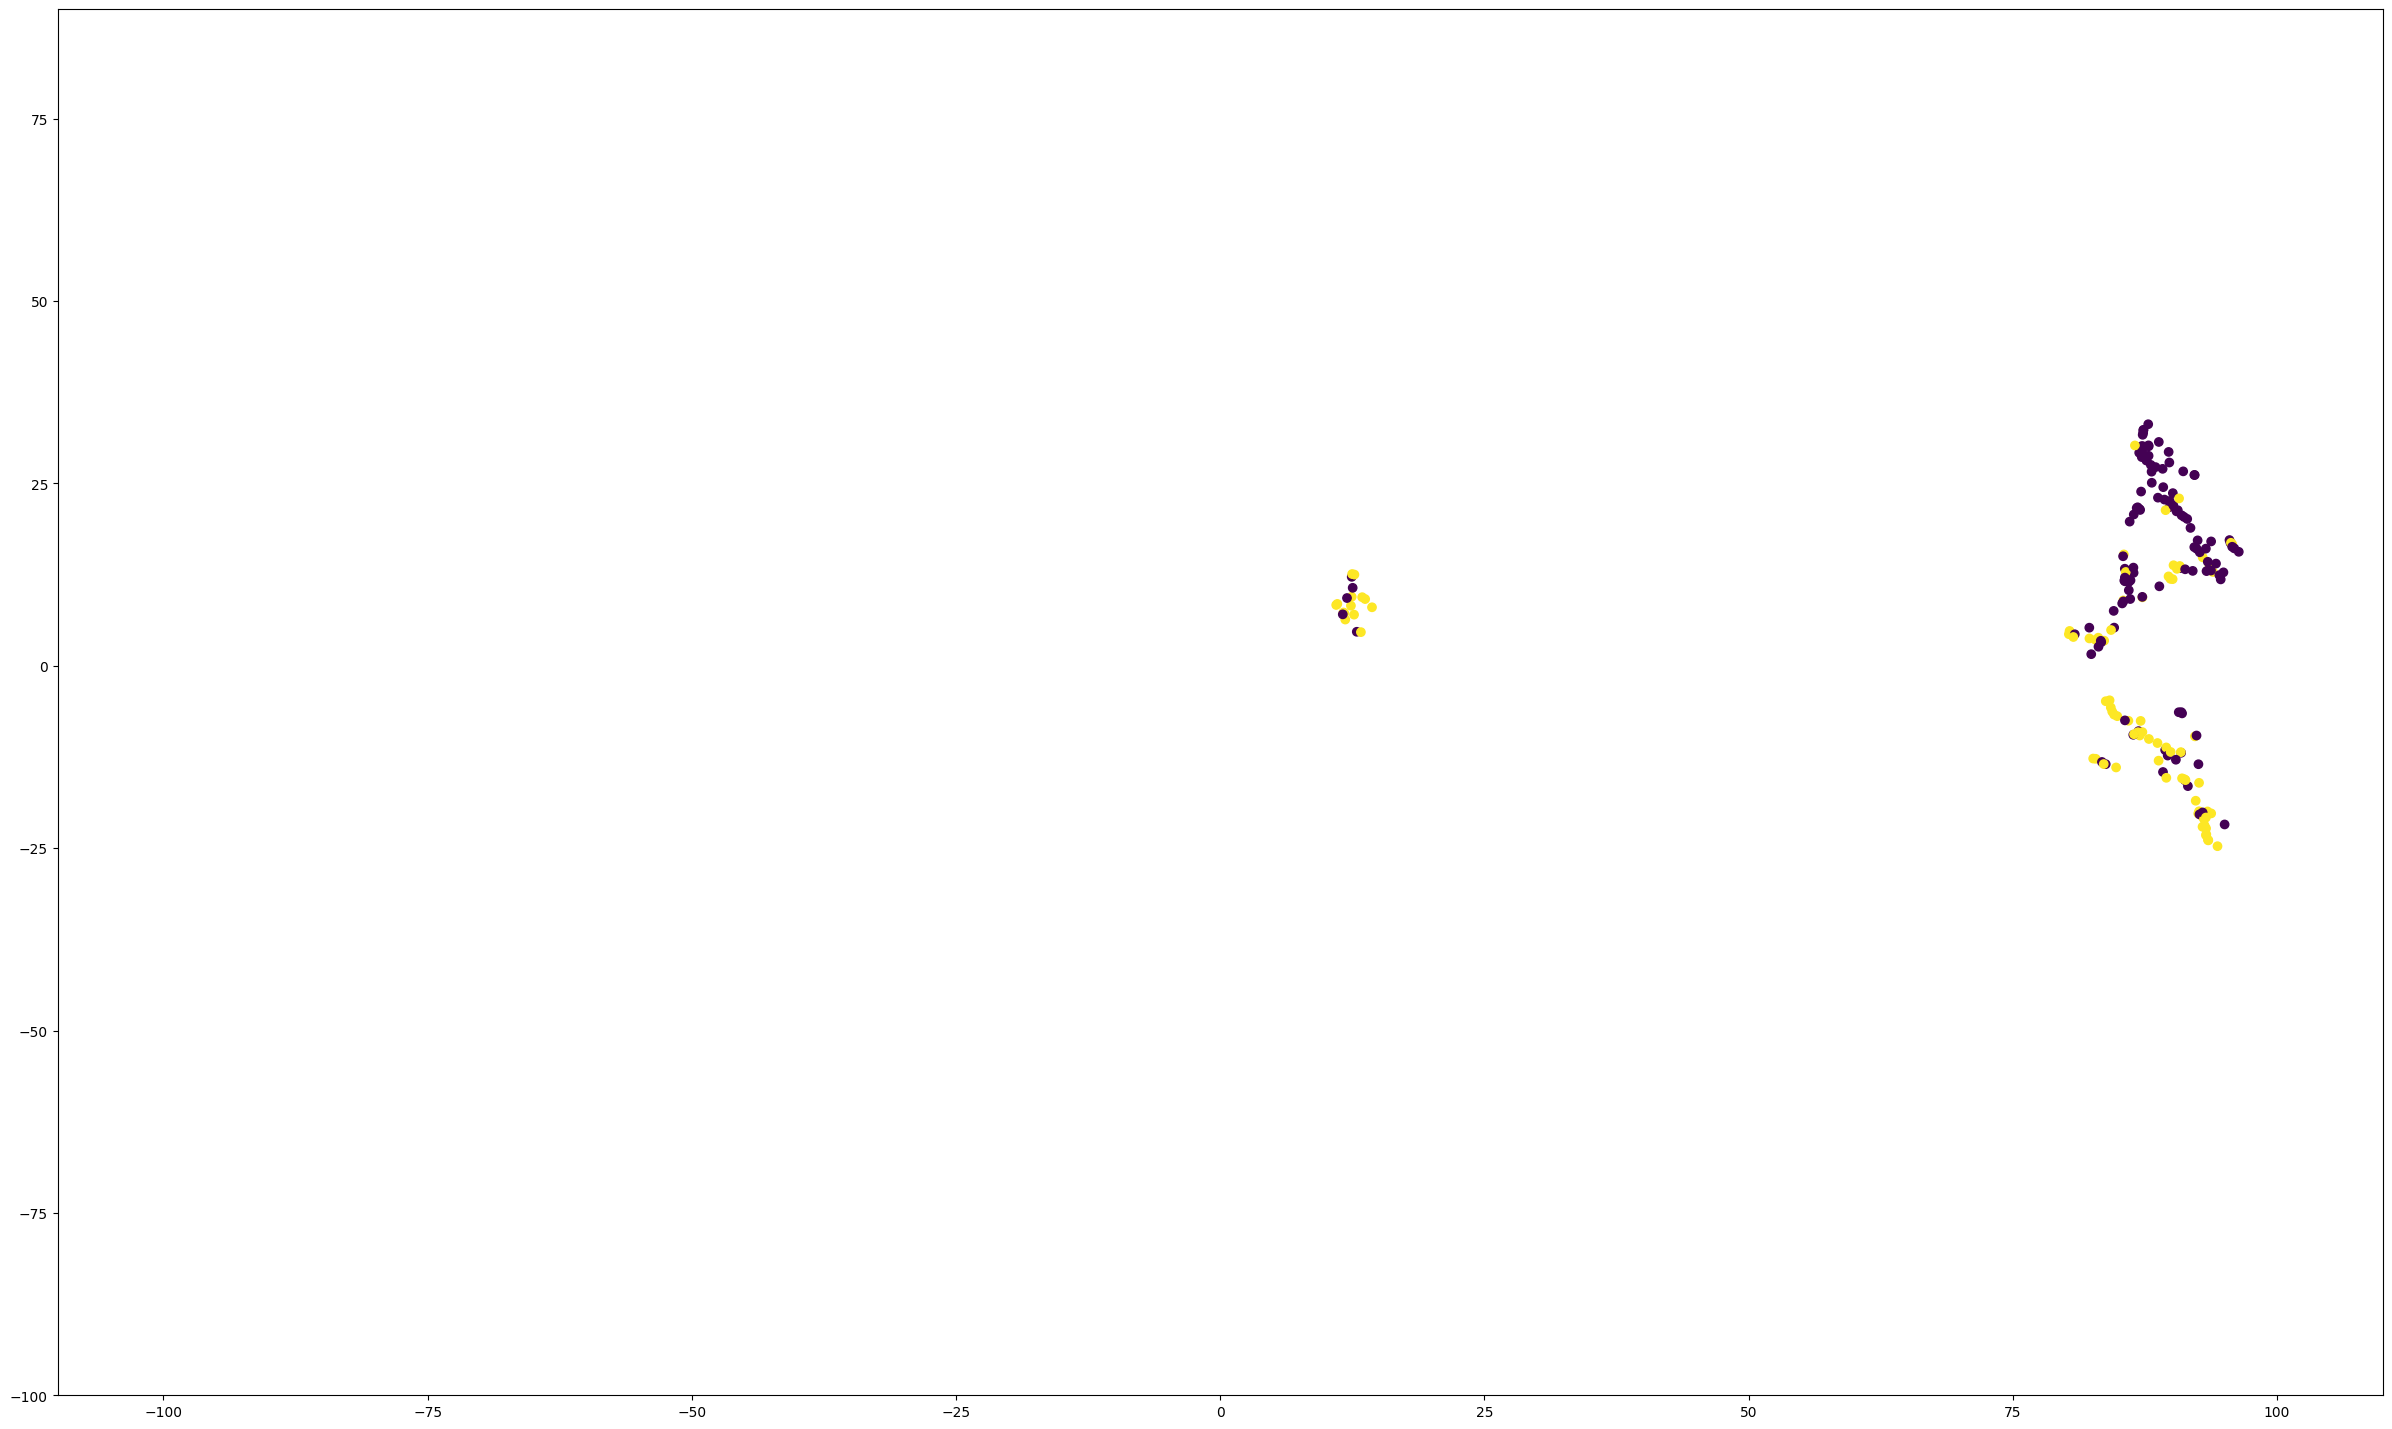

In [188]:
plt.scatter(X_embedded_global_clients[client_num][:, 0], X_embedded_global_clients[client_num][:, 1], c=labels_clients[client_num], )
plt.xlim(-110, 110)
plt.ylim(-100, 90)
plt.show()

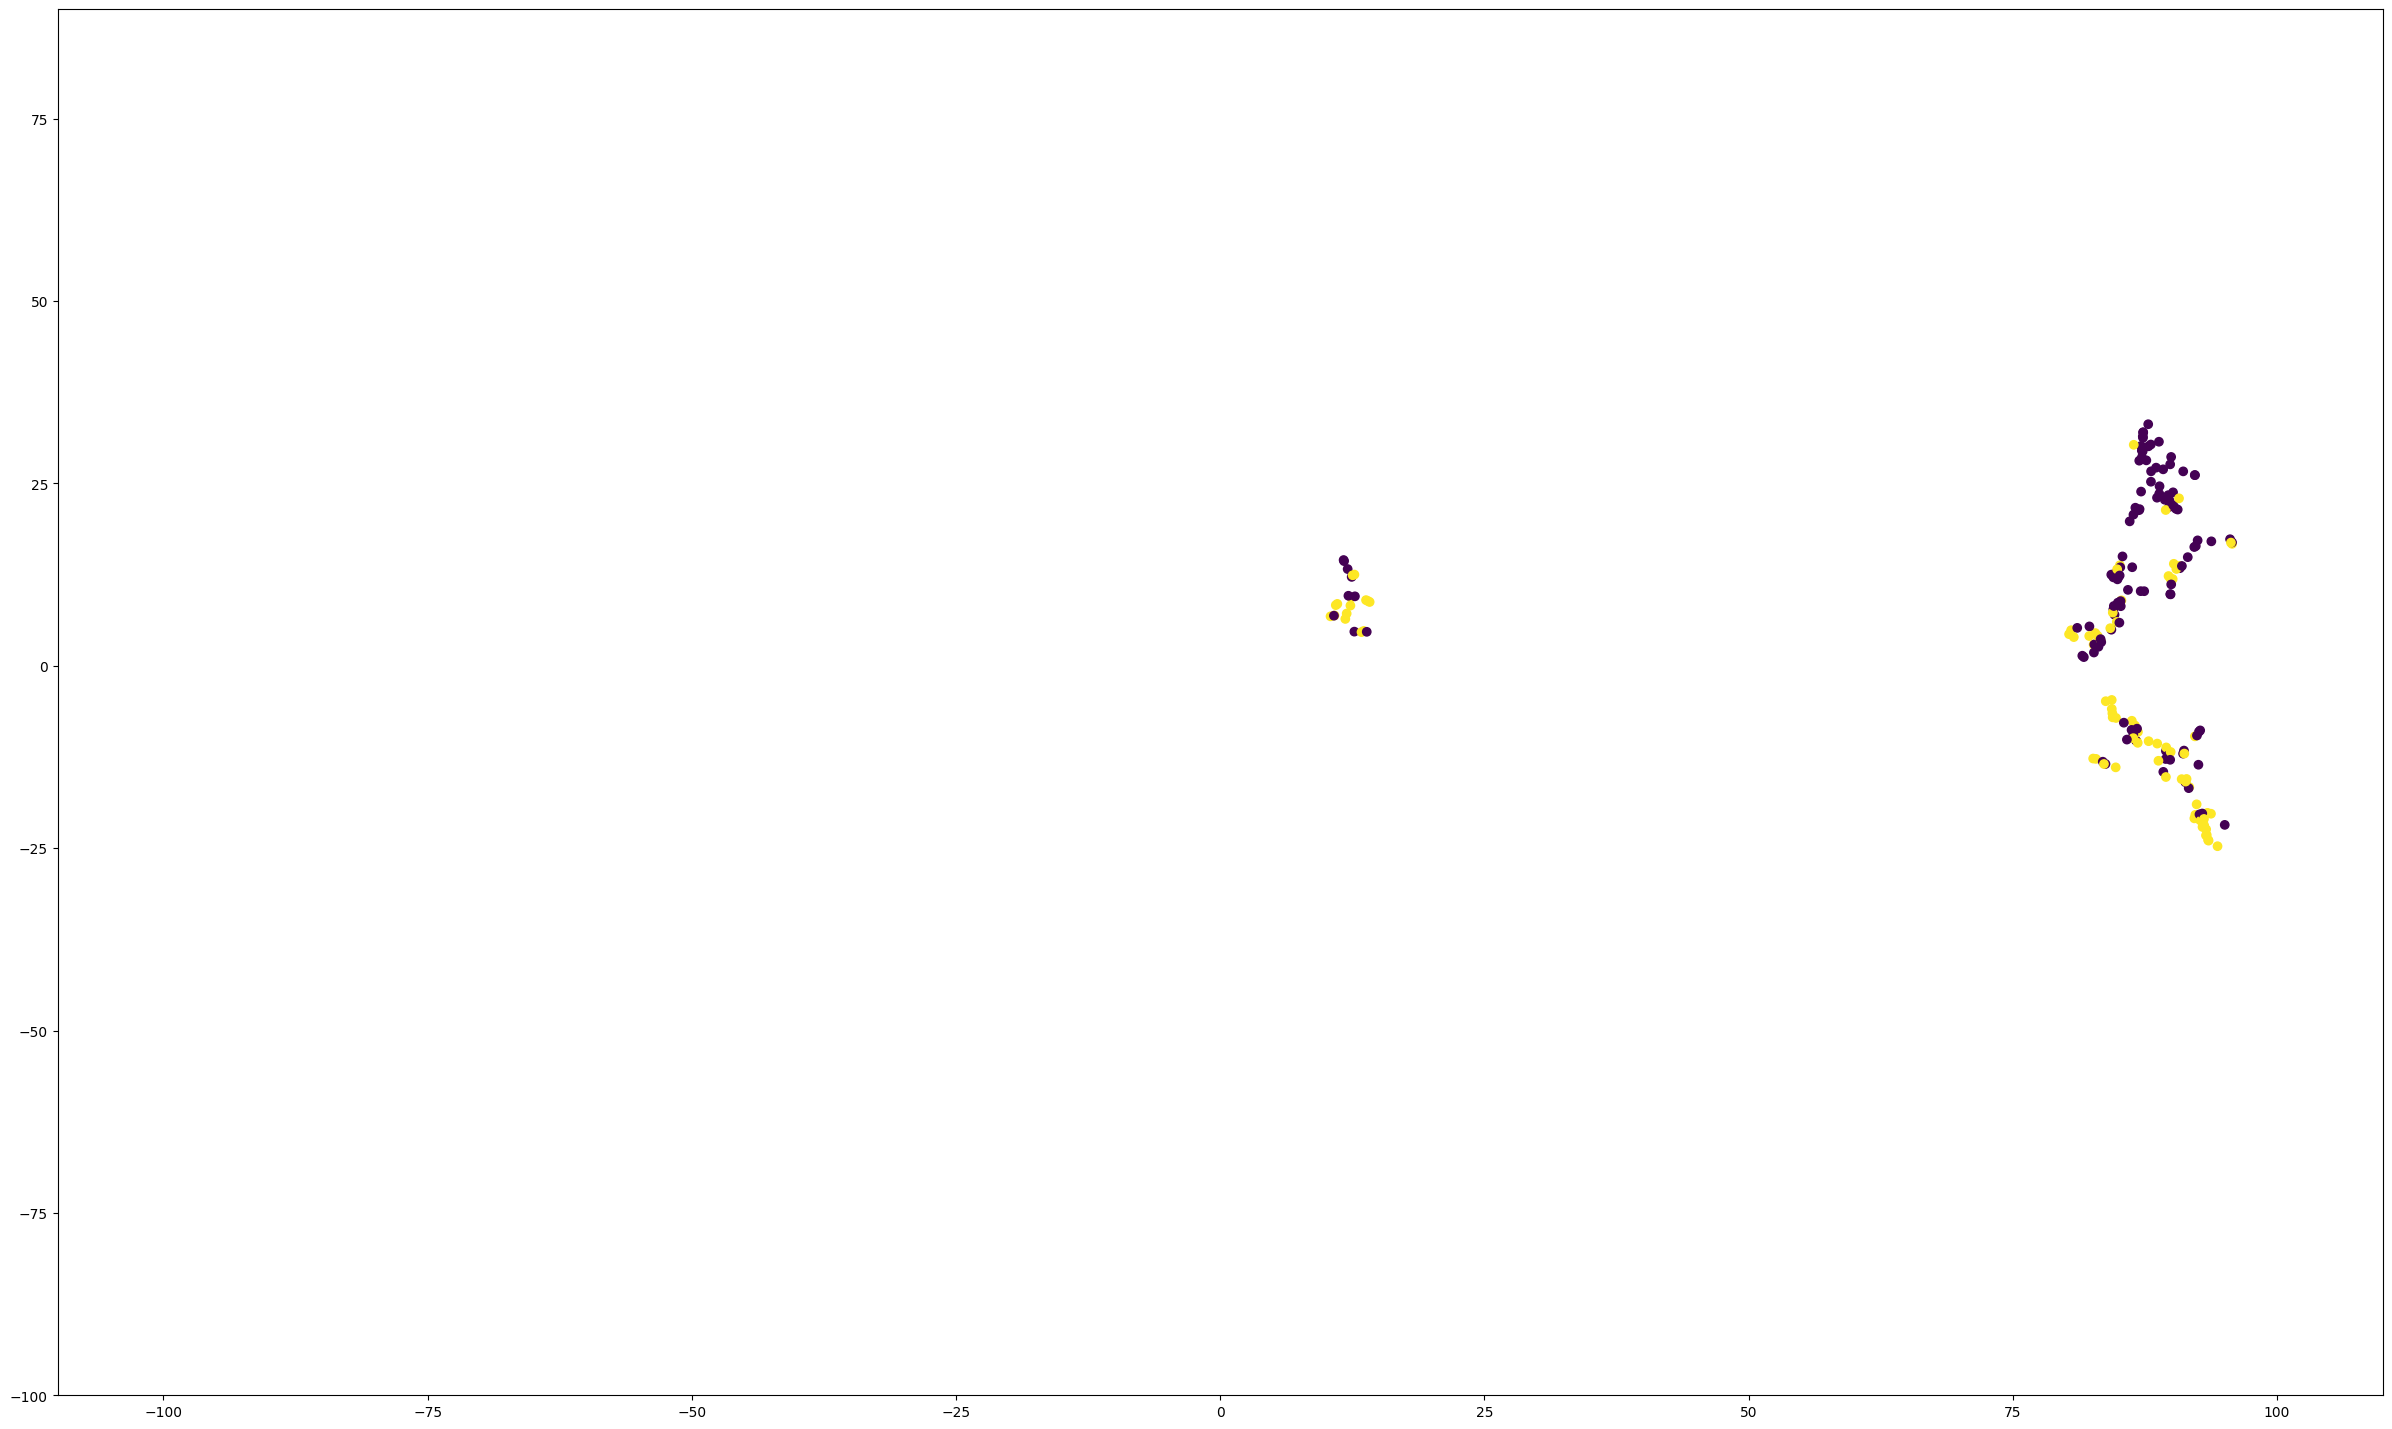

In [189]:
plt.scatter(X_embedded_interm_clients[client_num][:, 0], X_embedded_interm_clients[client_num][:, 1], c=labels_clients[client_num], )
plt.xlim(-110, 110)
plt.ylim(-100, 90)
plt.show()

In [149]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(30, 18))
plt.rcParams["figure.figsize"] = (30,18)

<Figure size 3000x1800 with 0 Axes>

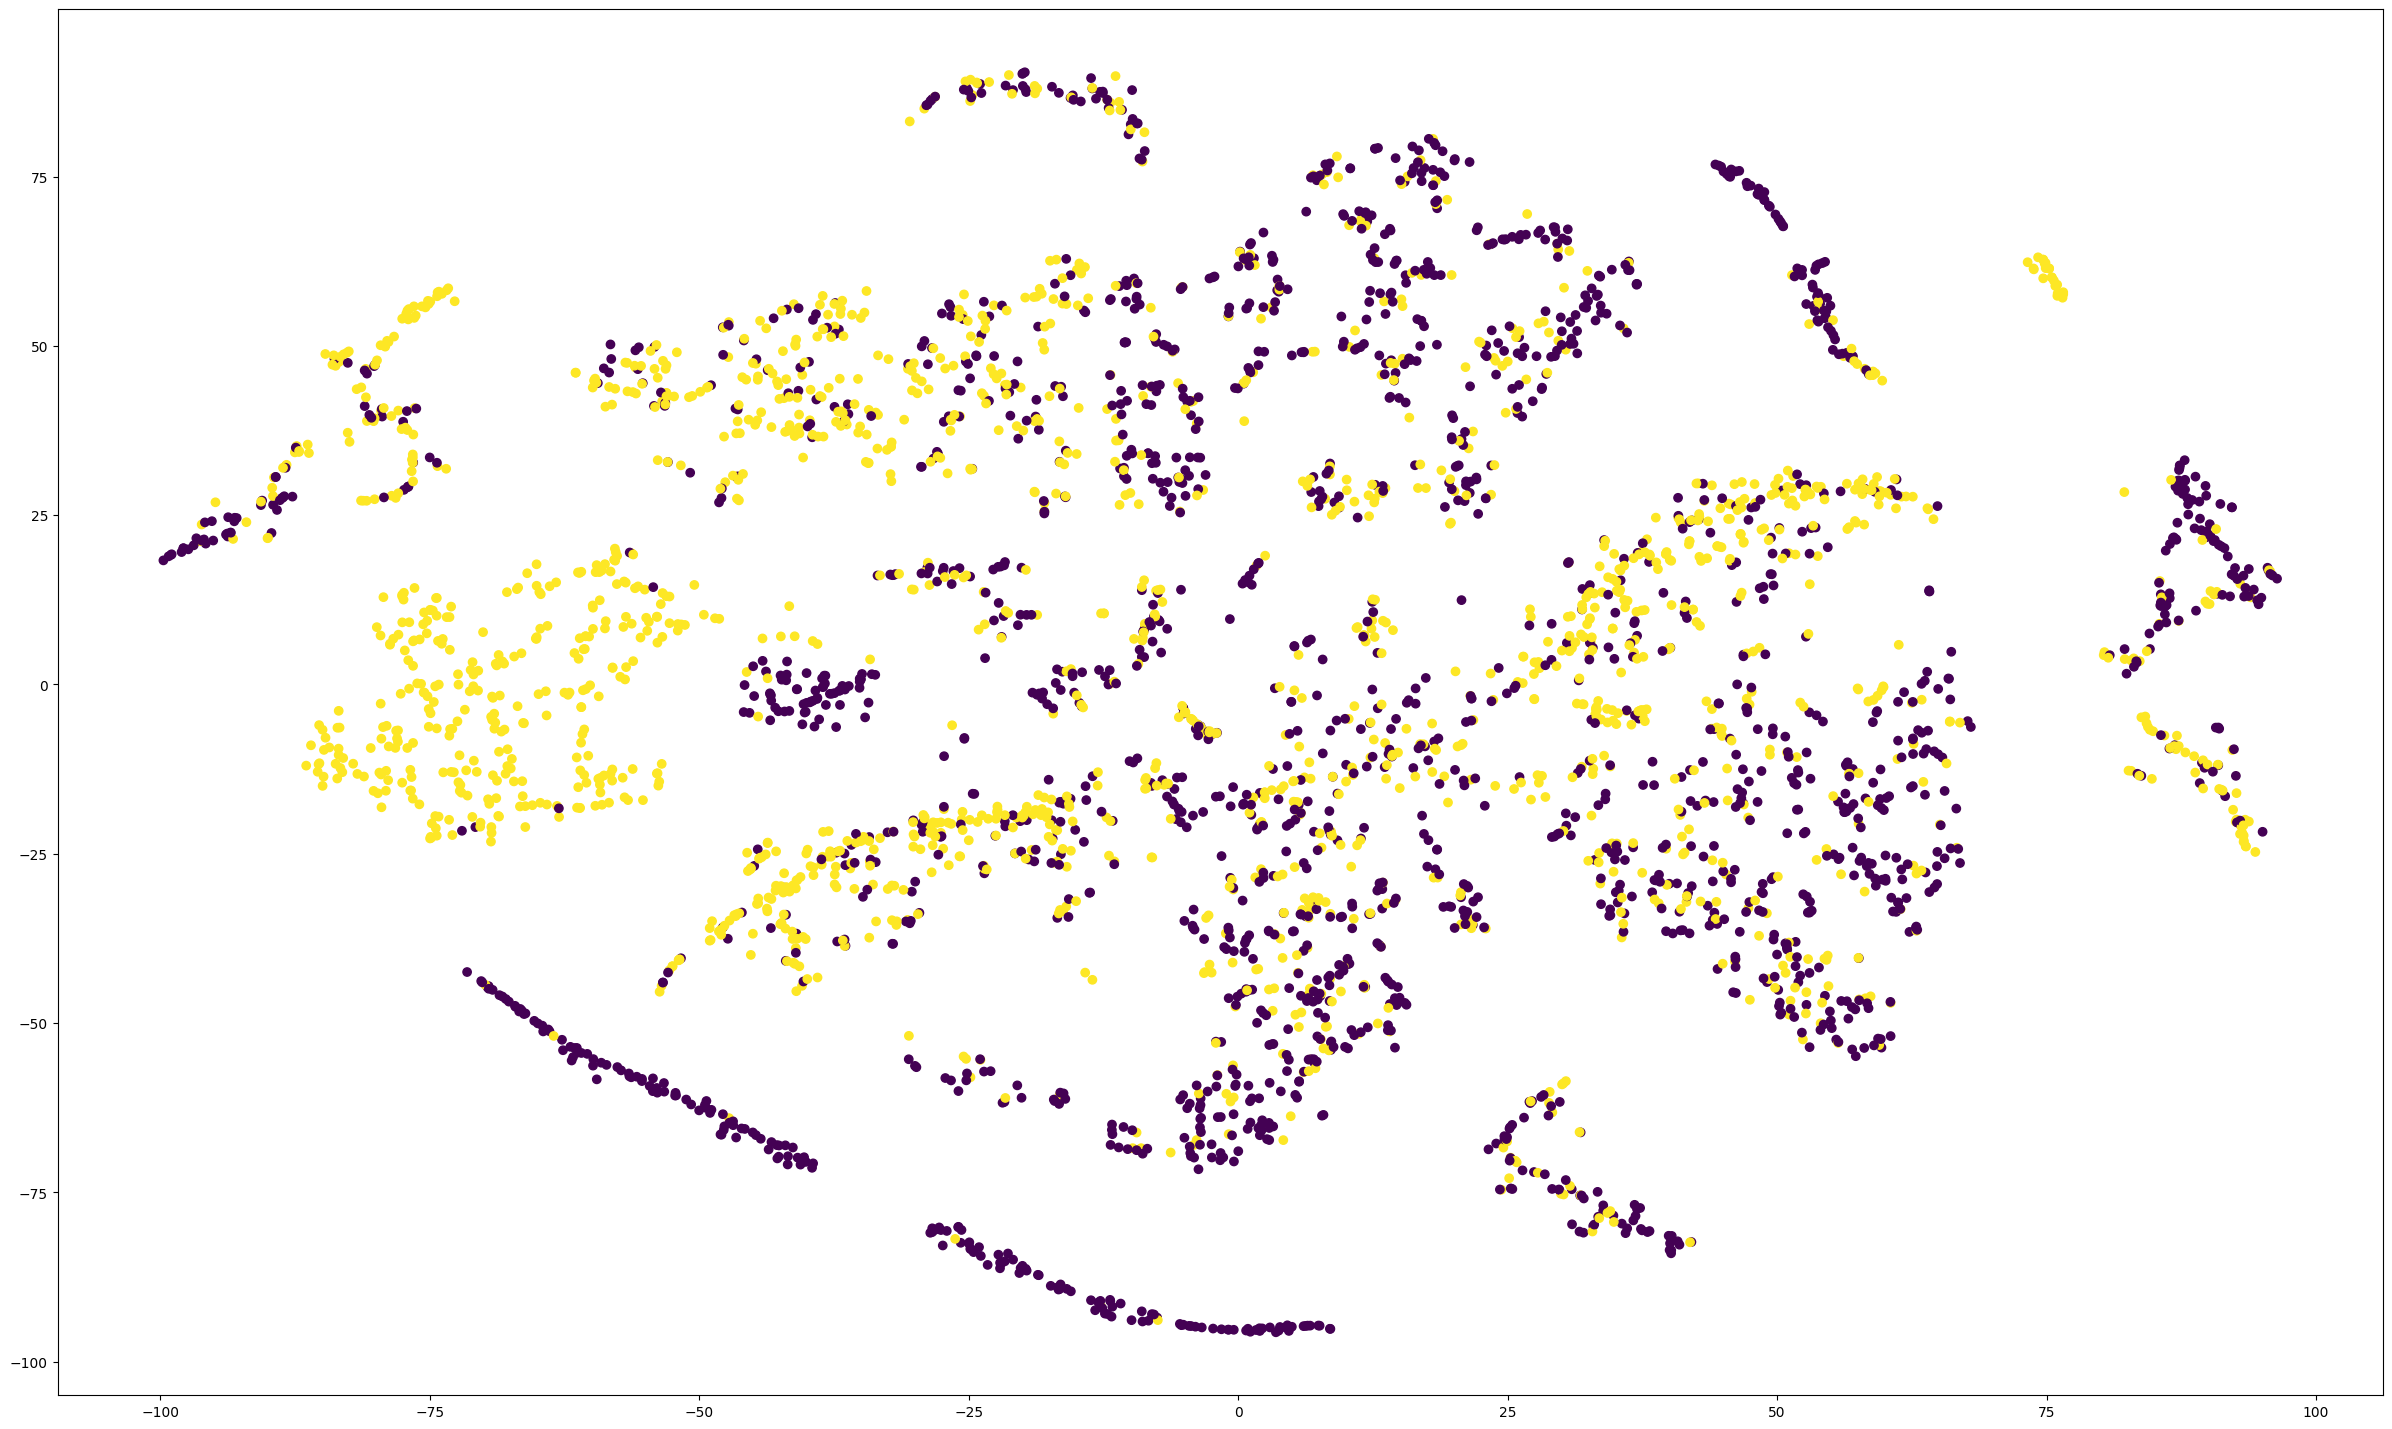

In [150]:
plt.scatter(X_embedded_global[:, 0], X_embedded_global[:, 1], c=labels_concat)
plt.show()

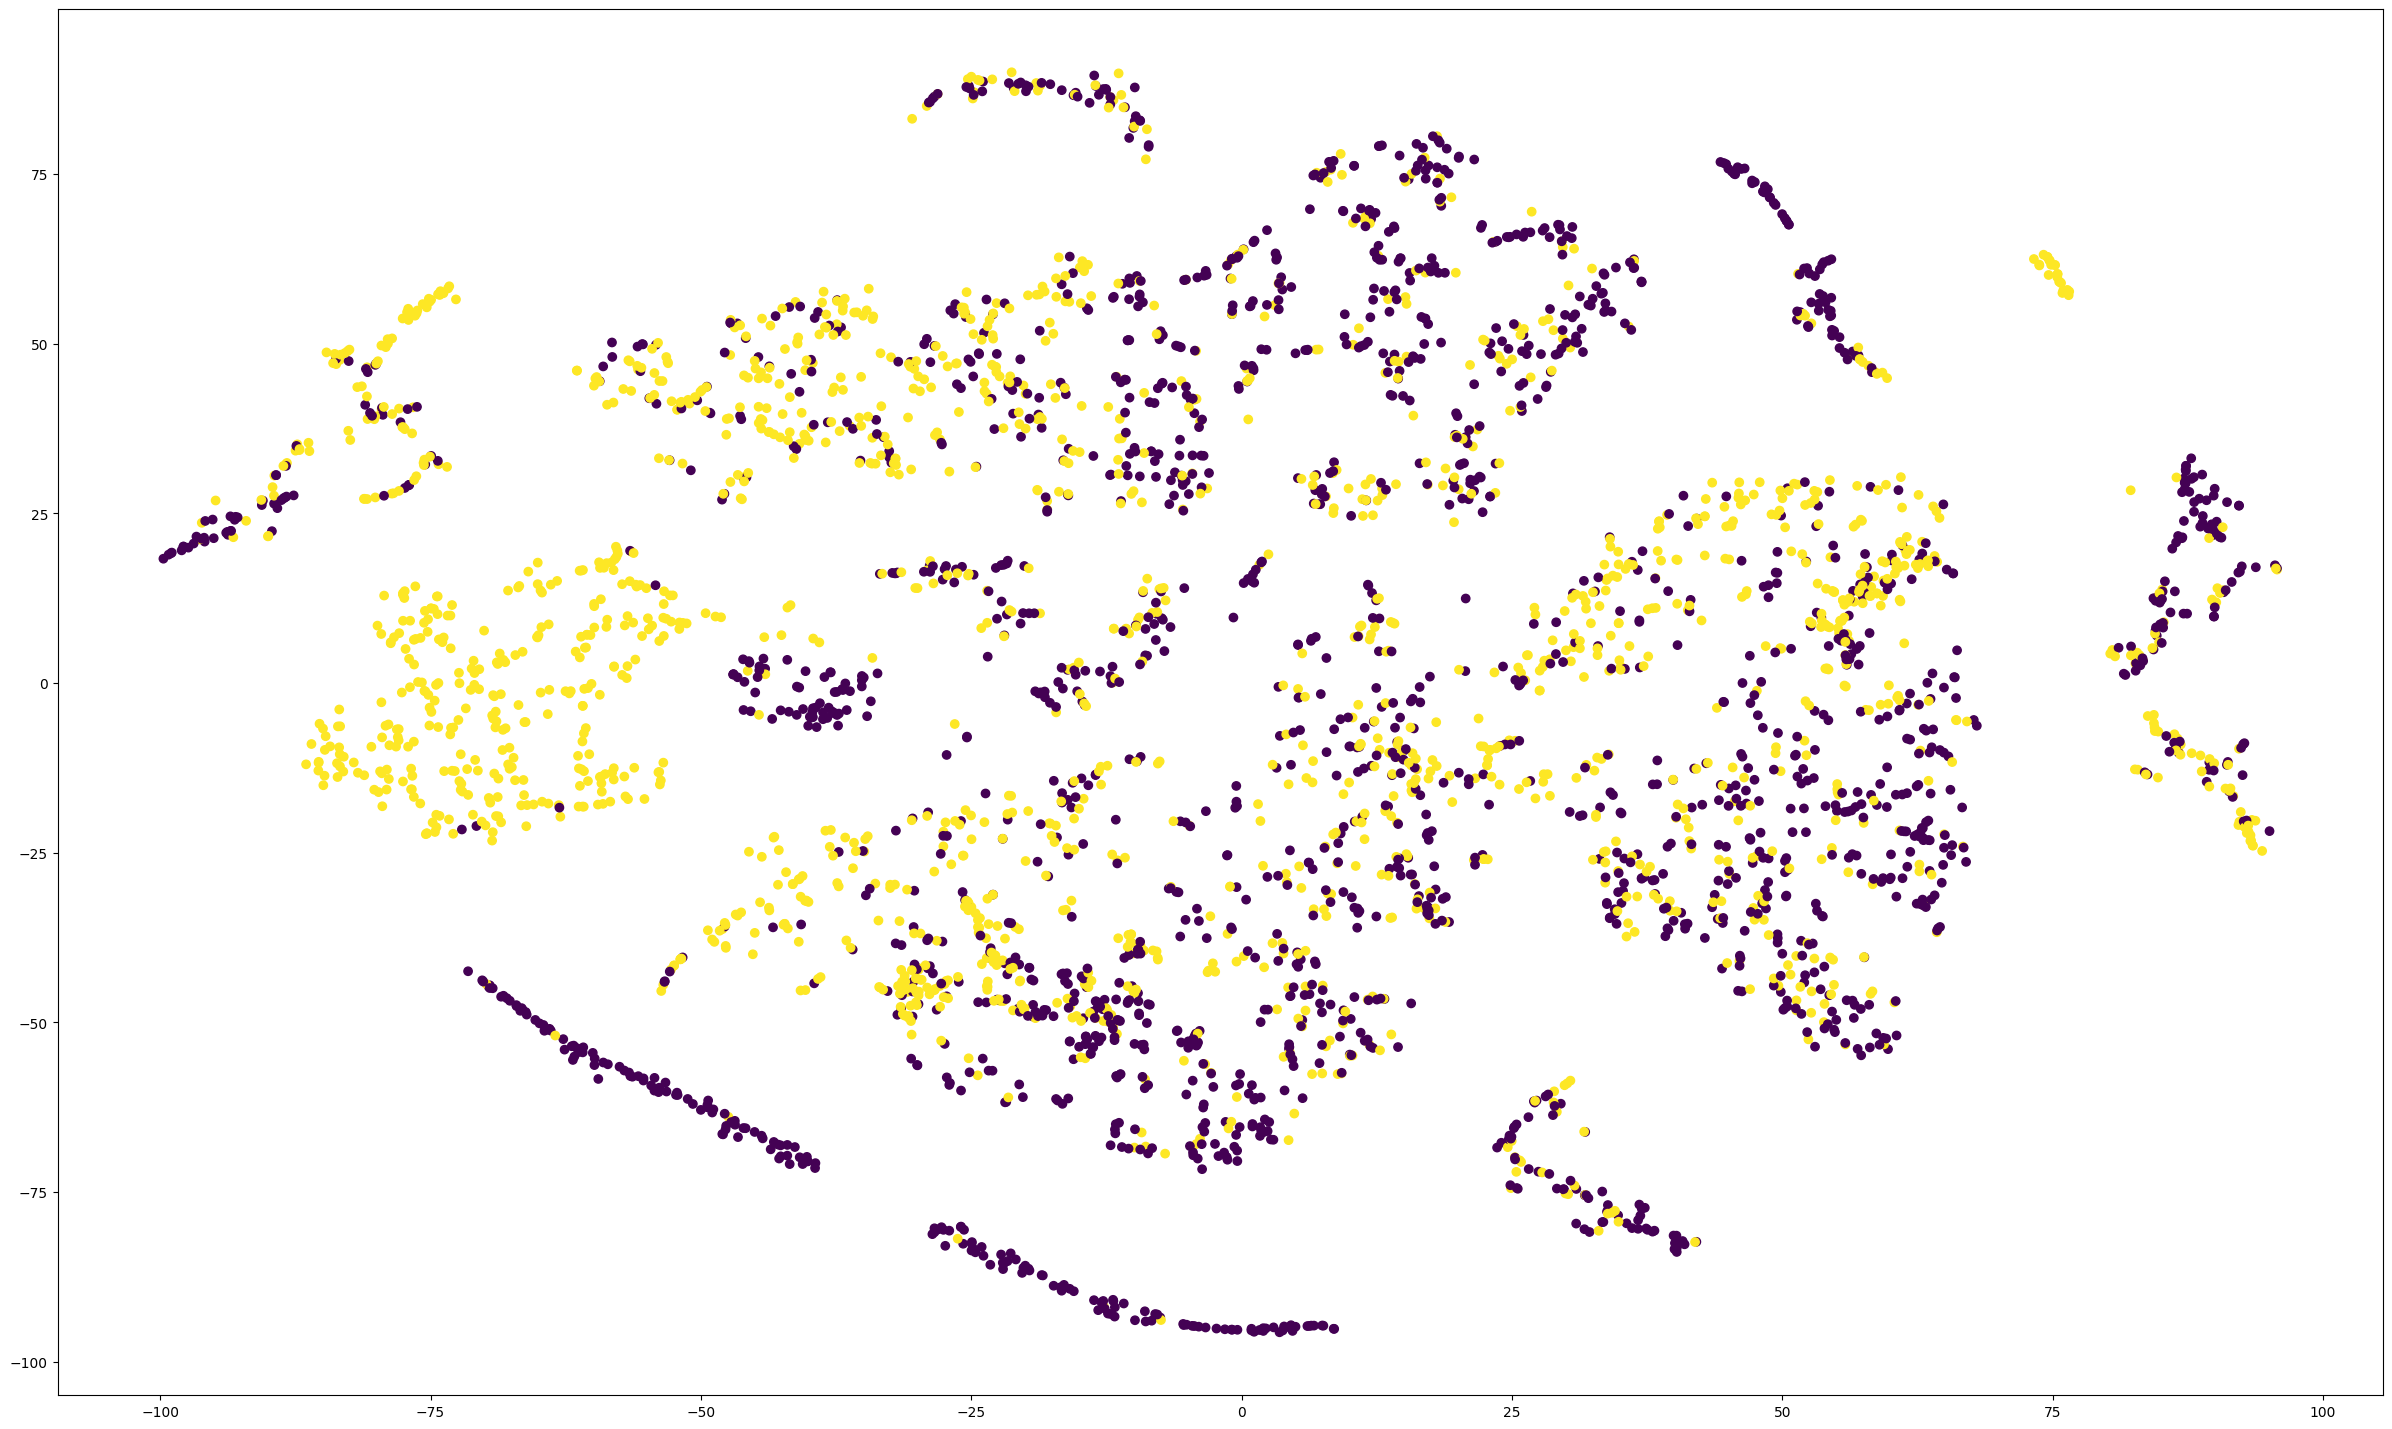

In [151]:

plt.scatter(X_embedded_interm[:, 0], X_embedded_interm[:, 1], c=labels_concat)
plt.show()

In [715]:
color_map = {0:'red', 1:'yellow', 2:'orange', 3:'green', 4:'cyan', 5:'grey'}
colors = list(map(color_map.get, labels))

In [716]:
scatter = ax.scatter(X_embedded[:, 0], X_embedded[:, 1], c=colors)

In [717]:
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")

/home/michael/Master-Thesis/CKIM_Competition/venv/lib/python3.9/site-packages/matplotlib/collections.py:1084: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


In [718]:
ax.add_artist(legend1)

In [719]:
plt.show()

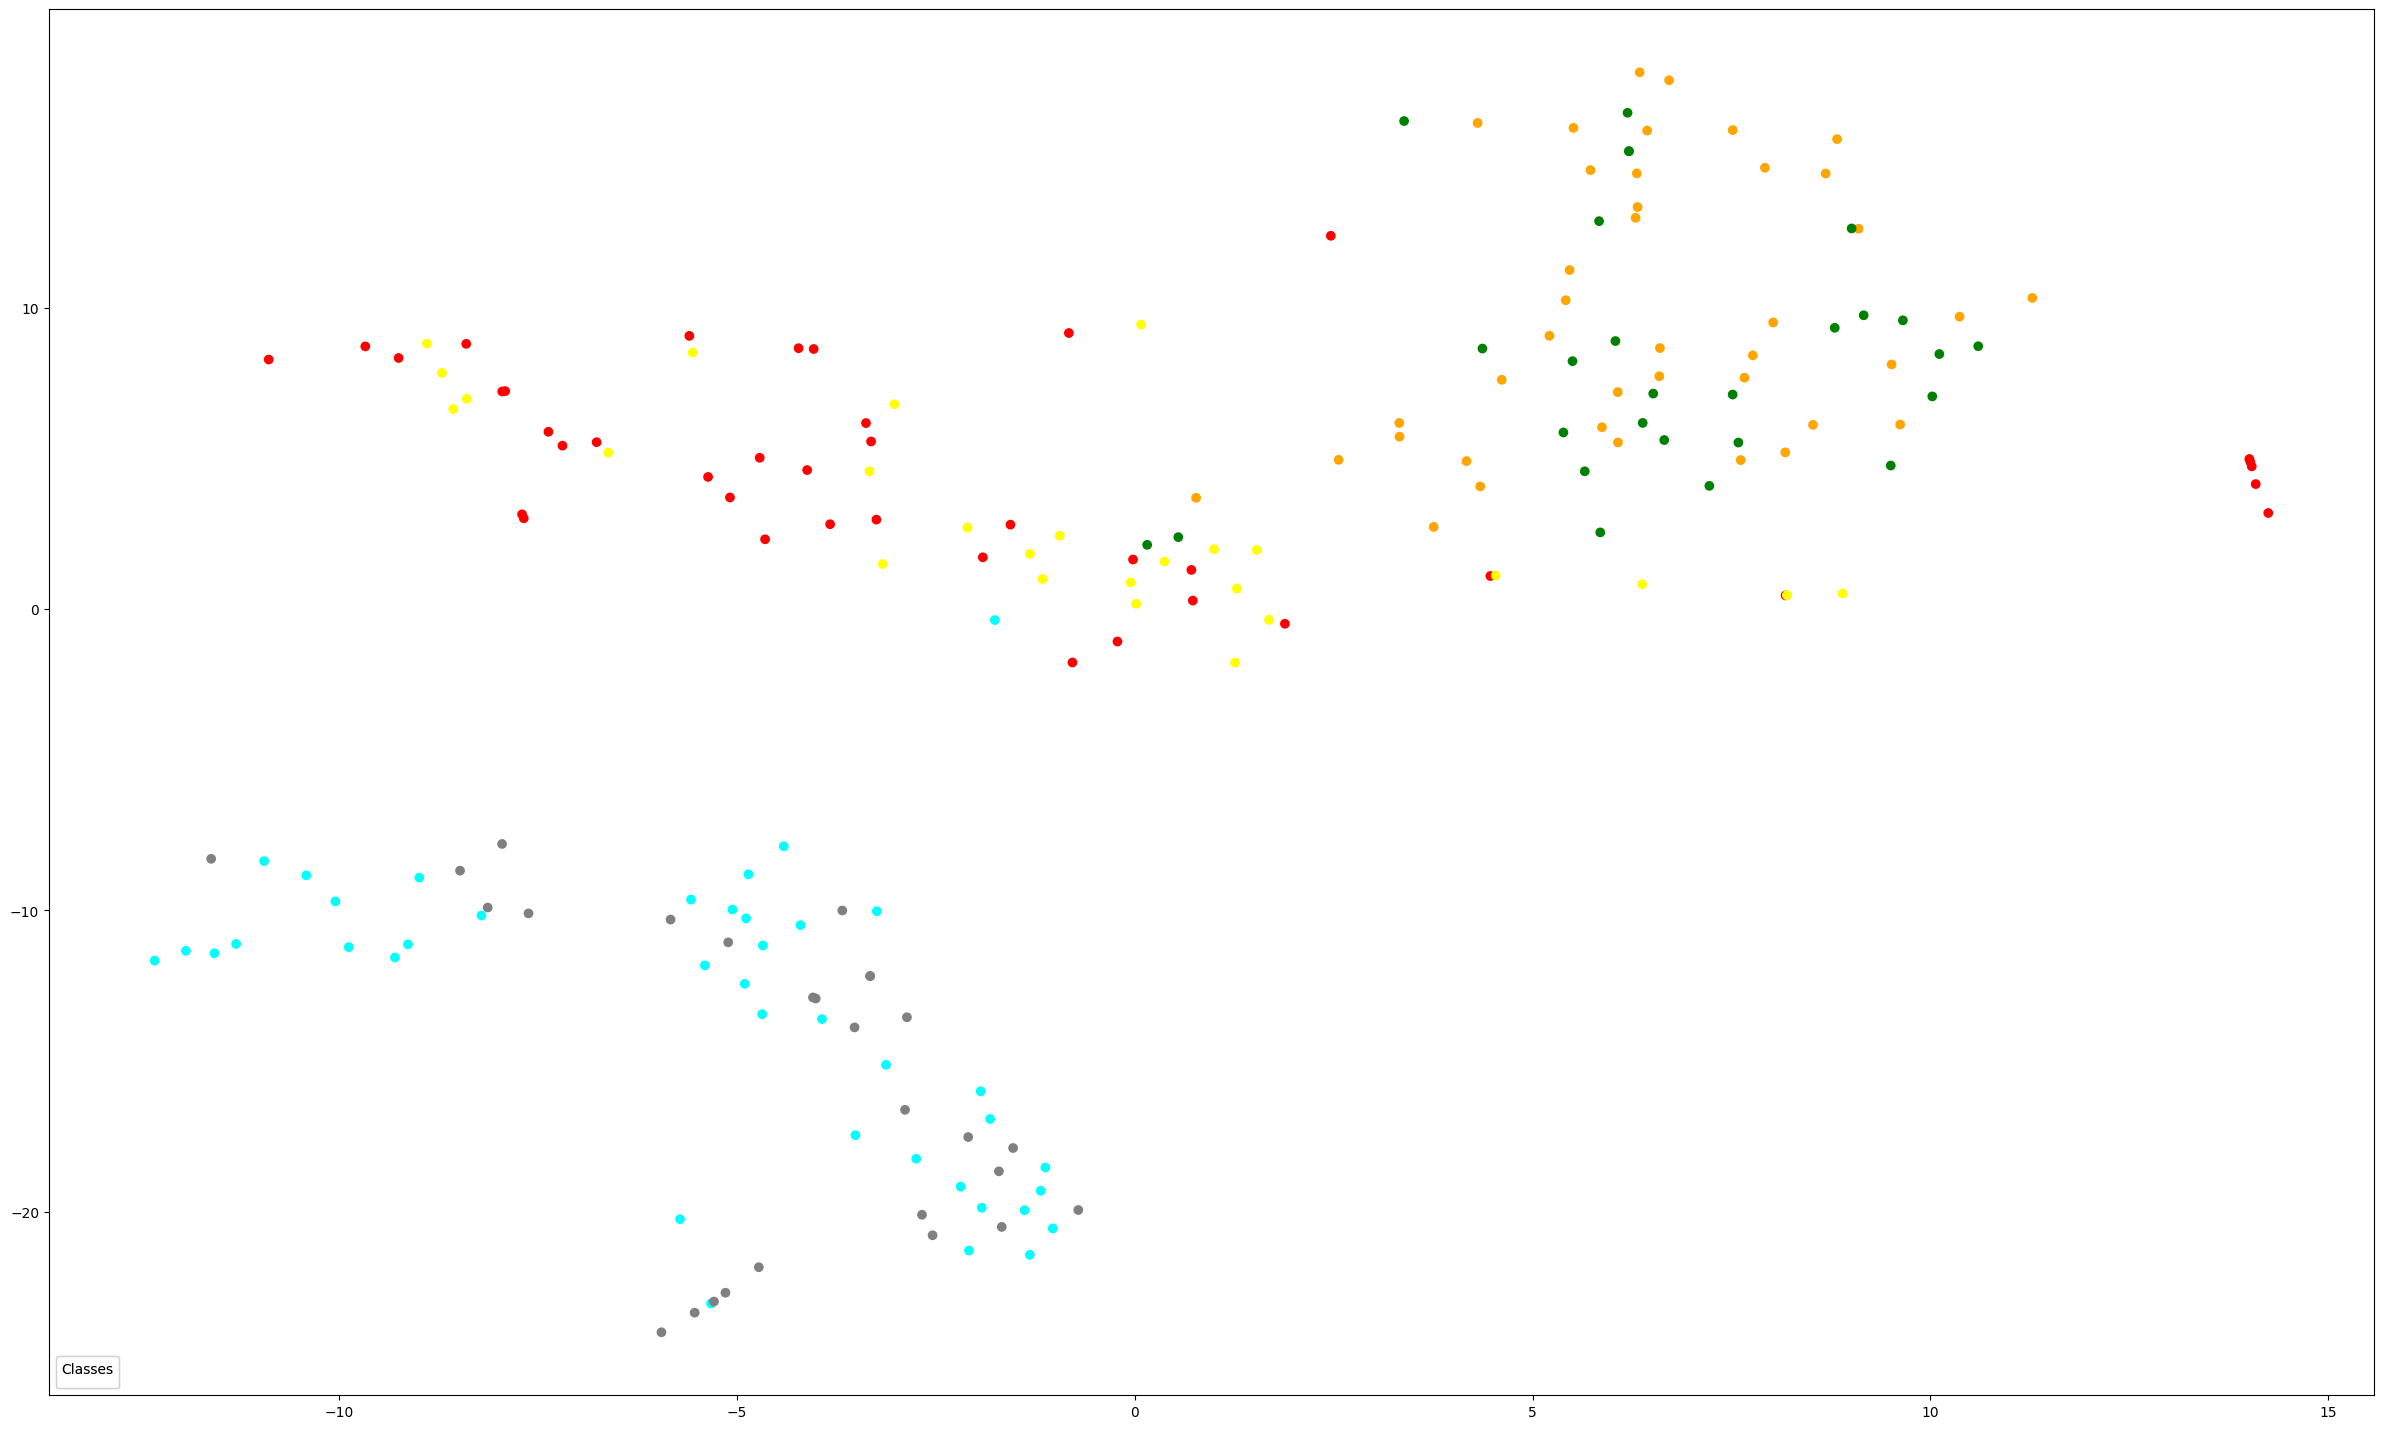

In [720]:
fig

In [721]:
scatter.legend_elements()

([], [])

In [722]:
X_embedded.shape[0]

201

In [723]:
X_embedded.shape[0]//2

100

In [724]:
X_embedded_combined = X_embedded[:X_embedded.shape[0]//2, :]

In [725]:
X_embedded_combined

array([[-7.95052767e+00,  7.22424650e+00],
       [-6.61820984e+00,  5.19681883e+00],
       [-1.31829917e+00,  1.83442080e+00],
       [-8.28844547e-01,  9.16503716e+00],
       [-5.59878540e+00,  9.07061195e+00],
       [ 1.53264463e+00,  1.96608758e+00],
       [ 1.40385447e+01,  4.73907089e+00],
       [ 1.40082331e+01,  4.98502874e+00],
       [ 8.17937756e+00,  4.57284600e-01],
       [ 8.19764709e+00,  4.66446400e-01],
       [ 4.46851015e+00,  1.10166967e+00],
       [ 1.40883198e+01,  4.15138388e+00],
       [ 1.65600386e-02,  1.81374416e-01],
       [-4.22583914e+00,  8.66160870e+00],
       [ 4.53627205e+00,  1.11645937e+00],
       [-9.67146969e+00,  8.72087383e+00],
       [ 8.19764709e+00,  4.66446400e-01],
       [-2.10442615e+00,  2.70498872e+00],
       [ 7.10971713e-01,  1.30229068e+00],
       [-3.02104712e+00,  6.80179310e+00],
       [-4.03634167e+00,  8.63512039e+00],
       [-1.56298494e+00,  2.80494857e+00],
       [-7.37026167e+00,  5.88713598e+00],
       [-7.

In [726]:
X_embedded_local = X_embedded[X_embedded.shape[0]//2:, :]

In [727]:
X_embedded_local

array([[  3.3238332 ,   6.180916  ],
       [  5.513246  ,  15.973459  ],
       [  9.160988  ,   9.753364  ],
       [  6.383352  ,   6.182154  ],
       [  7.6620326 ,   7.6819696 ],
       [ 11.280896  ,  10.329872  ],
       [  4.308505  ,  16.136408  ],
       [  6.6540823 ,   5.613214  ],
       [  9.653655  ,   9.585917  ],
       [  5.416158  ,  10.253253  ],
       [  5.655528  ,   4.575094  ],
       [  7.5151505 ,  15.899537  ],
       [  6.318526  ,  13.345319  ],
       [  6.715379  ,  17.554043  ],
       [  9.501406  ,   4.766759  ],
       [  8.02324   ,   9.514858  ],
       [  9.009426  ,  12.635581  ],
       [  3.3269591 ,   5.726058  ],
       [  7.7672915 ,   8.424495  ],
       [  7.51399   ,   7.123437  ],
       [  4.369316  ,   8.649708  ],
       [  6.592433  ,   7.7307687 ],
       [  6.2940106 ,  12.987884  ],
       [  6.439526  ,  15.883667  ],
       [  7.9200068 ,  14.648946  ],
       [  0.7703786 ,   3.6949124 ],
       [  6.1931977 ,  16.47495   ],
 

In [728]:
x_diff = X_embedded_local - X_embedded_combined

ValueError: operands could not be broadcast together with shapes (101,2) (100,2) 

In [ ]:
x_diff

In [ ]:
labels